In [21]:
import pickle
import shap
from matplotlib import pyplot as plt
# Visualising local predictions
shap.initjs()

## MCI/NC Classification

### Load MCI/NC model

In [8]:
rf, X_train, X_test, y_train, y_test = pickle.load(open('models/ADNI_MCI_NC', 'rb'))

In [9]:
explainer = shap.TreeExplainer(rf)

# shap_values[1] is the SHAP values for the positive class (Patient with AD) & shap_values[0] is SHAP values for the negative class (No AD)
shap_values = explainer.shap_values(X_test)

### Global Interpretation

Visualising global feature contributions...


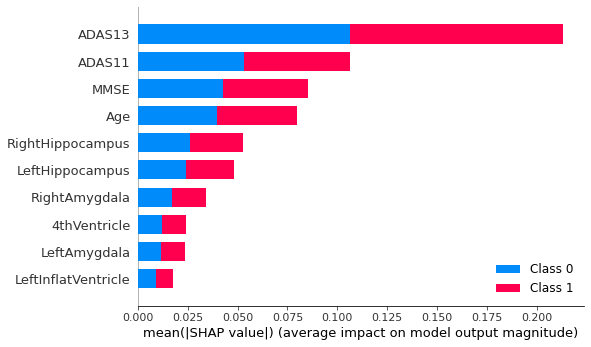

In [10]:
# Overall plot of importance for each feature
print("Visualising global feature contributions...")
test_range = X_test[1:400]
shap_values = explainer.shap_values(test_range)
shap.summary_plot(shap_values, X_test, max_display = 10)

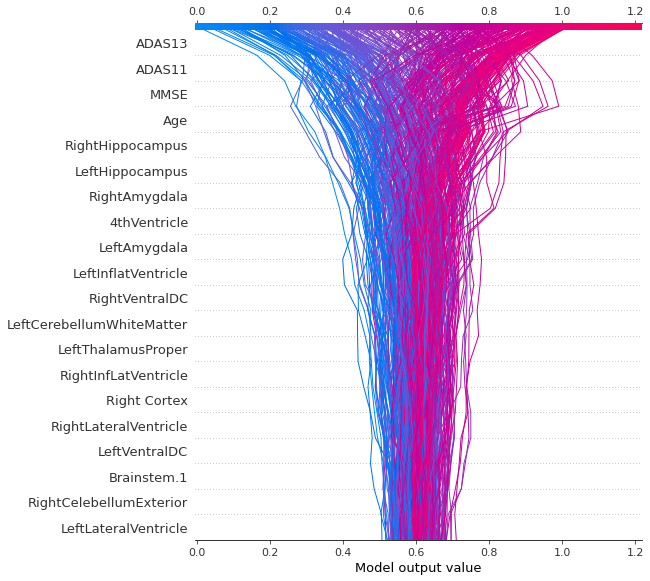

In [11]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], test_range)

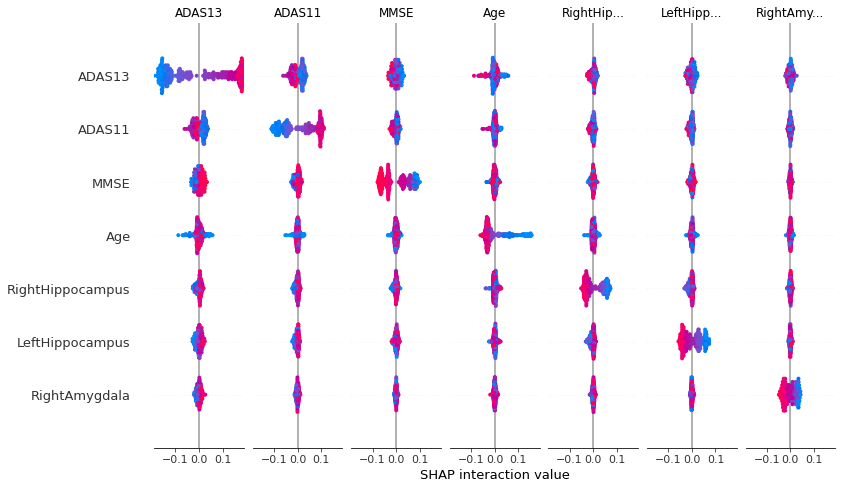

In [12]:
shap_interaction_values = explainer.shap_interaction_values(test_range)
shap.summary_plot(shap_interaction_values[1], test_range)

#### Dependence plots

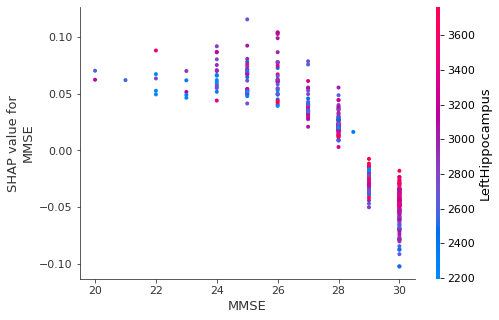

In [13]:
shap.dependence_plot(2, shap_values[1], test_range)

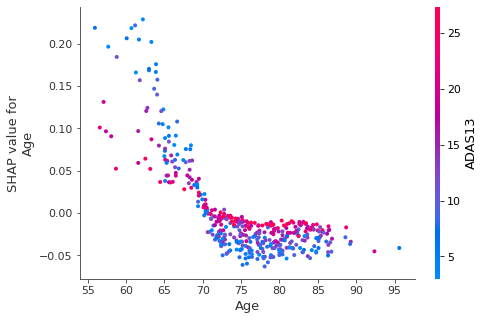

In [14]:
shap.dependence_plot(1, shap_values[1], test_range)

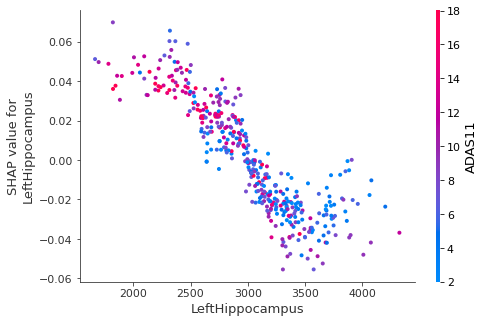

In [15]:
shap.dependence_plot(22, shap_values[1], test_range)

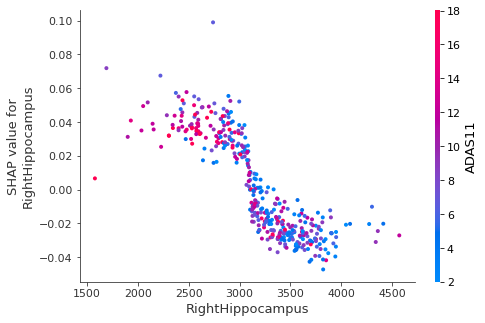

In [16]:
shap.dependence_plot(21, shap_values[1], test_range)

### Local Interpretation

In [17]:
def test_patient_fp(tp):
    test_patient = X_test[tp:tp+1]
    shap_values = explainer.shap_values(test_patient)

    prediction = rf.predict(test_patient)[0]
    if prediction == 0:
        classification = "NC"
    else:
        classification = "MCI"
    print(f"Random forest model predicted: {prediction} ({classification})")
    #shap.force_plot(explainer.expected_value[1], shap_values[1], test_patient)
    shap_plot = shap.force_plot(explainer.expected_value[1], shap_values[1], test_patient)
    return shap_plot

In [22]:
test_patient_fp(1)

Random forest model predicted: 1 (MCI)


In [23]:
test_patient_fp(28)

Random forest model predicted: 0 (NC)
